# Chinese Restaurant Process

In [41]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
class CRP:
    def __init__(self, alpha):
        self.n = 1
        self.n_tables = 1
        self.alpha = alpha
        self.tables = [1]
        self.probs = self._set_probs()
    
    def _set_probs(self):
        return [self.tables[i]/(self.alpha+self.n) for i in range(self.n_tables)] + [self.alpha/(self.alpha+self.n)]
    
    def draw(self):
        r = np.random.multinomial(1, self.probs, size=1)
        idx = np.argwhere(r.ravel()==1)[0][0]
        self.n += 1
        if r.ravel()[-1] == 1:
            self.n_tables += 1
            self.tables = self.tables + [1]
            self.probs = self._set_probs()
        else:
            self.tables[idx] += 1
            
        return idx + 1
        

In [3]:
alpha = 30
crp = CRP(alpha)
draws = []
N = 10000
for i in tqdm(range(N)):
    draws.append(crp.draw())

  0%|          | 0/10000 [00:00<?, ?it/s]

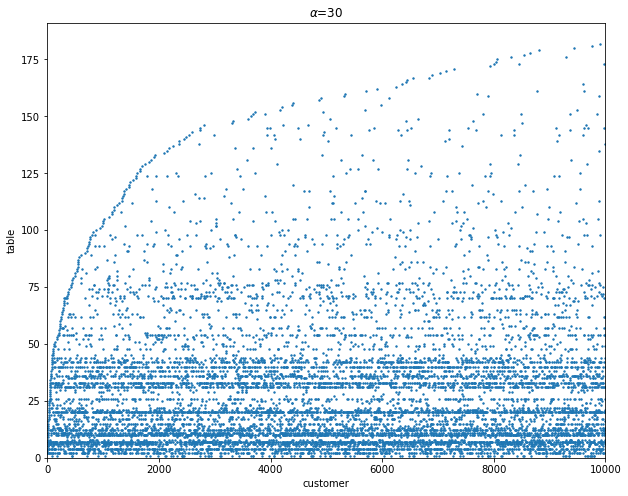

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(np.arange(1, N+1), draws, s=2)
ax.set_title(f"$\\alpha$={alpha}")
ax.set_ylabel("table")
ax.set_xlabel("customer")
ax.set_xlim(0, N)
ax.set_ylim(0, None);

In [33]:
alpha = 10
K = 2000
n_tab = []
N = 100
for k in tqdm(range(K)):
    crp = CRP(alpha)
    for i in range(N):
        crp.draw()
    n_tab.append(crp.n_tables)

  0%|          | 0/2000 [00:00<?, ?it/s]

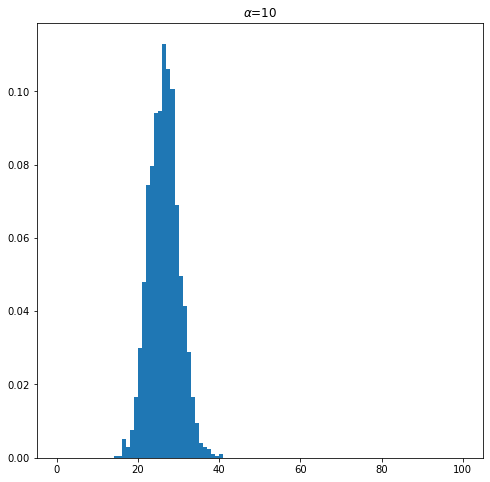

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(n_tab, density=True, range=(0, 100), bins=100);
ax.set_title(f"$\\alpha$={alpha}");

## Induced Dirichlet Process

In [56]:
alpha = 10
crp = CRP(alpha)
draws = []
N = 10000
for i in tqdm(range(N)):
    draws.append(crp.draw())

  0%|          | 0/10000 [00:00<?, ?it/s]

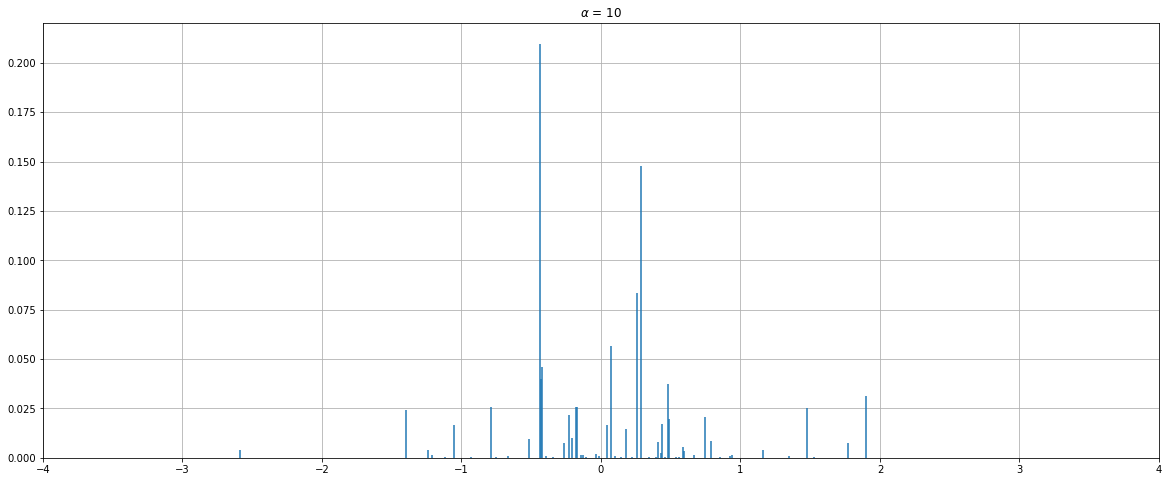

In [57]:
fix, ax = plt.subplots(figsize=(20,8))
y = st.norm.rvs(size=len(crp.tables))
[ax.vlines(y[i], 0, (np.asarray(crp.tables)/N)[i]) for i in range(len(crp.tables))]
ax.set_ylim(0,None)
ax.set_xlim(-4,4)
ax.grid(True)
ax.set_title(f"$\\alpha$ = {alpha}");